# Benchmark `oxidized_thainlp.segment`

Benchmarks Rust `oxidized_thainlp.segment` (unsafe) against Python `newmm.segment` (unsafe) using the same dictionary.

https://github.com/PyThaiNLP/oxidized-thainlp/

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm


def time_func(func, arg):
    start_time = time.time()
    func(arg)
    return time.time() - start_time

## Load Custom Dictionary to the Tokenizers

Both `oxidized_newmm()` and `py_newmm()` will use the same word list (`words_th.txt`)

In [2]:
DICT_FILE = "../words_th.txt"

In [3]:
from pythainlp.tokenize.newmm import segment as py_segment
from pythainlp.util import dict_trie

trie = dict_trie(dict_source=DICT_FILE)

def py_newmm(txt, safe_mode=False):
    return py_segment(txt, safe_mode=safe_mode, custom_dict=trie)

In [4]:
from oxidized_thainlp import load_dict
from oxidized_thainlp import segment as oxidized_segment

load_dict(DICT_FILE, "test_dict")  # create "test_dict" dictionary

def oxidized_newmm(txt, safe=False, parallel=False):
    return oxidized_segment(txt, dict_name="test_dict", safe=safe, parallel=parallel)

Successful: dictionary name test_dict from file ../words_th.txt has been successfully loaded


## Load Test data

In [5]:
from datasets import load_dataset

datasets = load_dataset('wisesight_sentiment')
datasets

Reusing dataset wisesight_sentiment (/Users/arthit/.cache/huggingface/datasets/wisesight_sentiment/wisesight_sentiment/1.0.0/fc2b1bdfe79571b2e281e4afdb5aac069cf9270bf0f85694239be672a4191969)


DatasetDict({
    train: Dataset({
        features: ['category', 'texts'],
        num_rows: 21628
    })
    validation: Dataset({
        features: ['category', 'texts'],
        num_rows: 2404
    })
    test: Dataset({
        features: ['category', 'texts'],
        num_rows: 2671
    })
})

In [6]:
txt = datasets['train']['texts'][0]
txt

'ไปจองมาแล้วนาจา Mitsubishi Attrage ได้หลังสงกรานต์เลย รอขับอยู่นาจา กระทัดรัด เหมาะกับสาวๆขับรถคนเดียวแบบเรา ราคาสบายกระเป๋า ประหยัดน้ำมัน วิ่งไกลแค่ไหนหายห่วงค่ะ'

In [7]:
py_newmm(txt)[:10]

['ไป', 'จอง', 'มา', 'แล้', 'วนา', 'จา', ' ', 'Mitsubishi', ' ', 'Attrage']

In [8]:
oxidized_newmm(txt)[:10]

['ไป', 'จอง', 'มา', 'แล้', 'วนา', 'จา', ' ', 'Mitsubishi', ' ', 'Attrage']

## One Example

### Average Run Time for One Example

In [9]:
%timeit py_newmm(txt)

302 µs ± 4.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%timeit oxidized_newmm(txt)

122 µs ± 490 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit oxidized_newmm(txt, parallel=True)

191 µs ± 4.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%timeit py_newmm(txt, safe_mode=True)

319 µs ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
%timeit oxidized_newmm(txt, safe=True)

131 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## All Examples

### Check If Results Match for All Examples

In [14]:
corrects = [oxidized_newmm(txt) == py_newmm(txt) for txt in datasets['train']['texts']]
np.mean(corrects), len(corrects)

(0.9999075272794525, 21628)

### Average Run Time Across All Examples

In [15]:
py_newmms = [time_func(py_newmm, txt) for txt in datasets['train']['texts']]
oxidized_newmms = [time_func(oxidized_newmm, txt) for txt in datasets['train']['texts']]

# oxidized newmm is over 2x faster than python newmm, on average
np.mean(py_newmms), np.mean(oxidized_newmms), np.mean(py_newmms) / np.mean(oxidized_newmms)

(0.00018665333960046163, 7.660526300680401e-05, 2.4365602606688164)

(array([1.6735e+04, 2.6210e+03, 1.1510e+03, 4.4700e+02, 2.4700e+02,
        1.2300e+02, 8.2000e+01, 6.2000e+01, 4.0000e+01, 2.5000e+01,
        1.5000e+01, 1.5000e+01, 1.4000e+01, 8.0000e+00, 1.0000e+01,
        7.0000e+00, 7.0000e+00, 7.0000e+00, 4.0000e+00, 4.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([3.81469727e-06, 9.00665919e-05, 1.76318487e-04, 2.62570381e-04,
        3.48822276e-04, 4.35074170e-04, 5.21326065e-04, 6.07577960e-04,
        6.93829854e-04, 7.80081749e-04, 8.66333644e-04, 9.52585538e-04,
        1.03883743e-03, 1.12508933e-03, 1.21134122e-03, 1.29759312e-03,
        1.38384501e-03, 1.47009691e-03, 1.55634880e-03, 1.64260070e-03,
        1.72885259e-03, 1.81510448e-03, 1.90135638e-03, 1.98760827e-03,
        2.07386017e-03, 2.16011206e-03, 2.24636396e-03, 2.33261585e-03,
        2.41886775e-03, 2.50511964e-03, 2.59137154e-03]),
 <BarContainer object of 30 

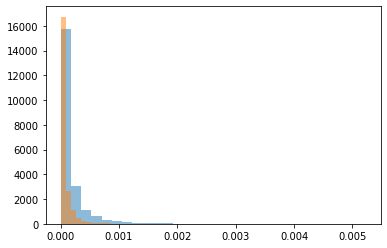

In [16]:
# look at distribution; oxidized newmm also consistently performs better
plt.hist(py_newmms, bins=30, alpha=0.5)
plt.hist(oxidized_newmms, bins=30, alpha=0.5)

## Run Time as Sequence Length Grows

In [17]:
txt = datasets['train']['texts'][1]
txt2 = ''.join(oxidized_newmm(txt)[:10])
txt2, len(oxidized_newmm(txt2))

('เปิดศักราชใหม่! นายกฯ แถลงข่าวก่อนการแข่งขัน', 10)

In [18]:
py_newmms = [time_func(py_newmm, txt2*i) for i in tqdm([10**j for j in range(5)])]
oxidized_newmms = [time_func(oxidized_newmm, txt2*i) for i in tqdm([10**j for j in range(5)])]

Performance starts really deviate when sequence length > 10^3 tokens and above.

python newmm is dashed line.

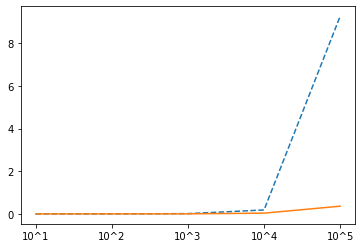

In [19]:
positions = [i for i in range(5)]
labels = [f'10^{i+1}' for i in range(5)]
plt.xticks(positions, labels)
plt.plot(py_newmms, linestyle='dashed')
plt.plot(oxidized_newmms)

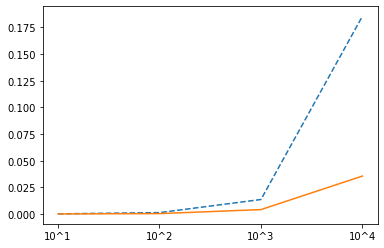

In [20]:
# zooming in on inflexion point
positions = [i for i in range(4)]
labels = [f'10^{i+1}' for i in range(4)]
plt.xticks(positions, labels)
plt.plot(py_newmms[:-1], linestyle='dashed')
plt.plot(oxidized_newmms[:-1])